In [1]:
%%capture
!pip install numpy
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import (balanced_accuracy_score, f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix, ConfusionMatrixDisplay,
                             roc_curve, auc)

# Configure matplotlib
mpl.rc('xtick', labelsize=16)
mpl.rc('ytick', labelsize=16)
mpl.rcParams.update({'font.size': 15})
plt.ioff()

In [3]:
data_directory = '/path/to/your/dataset'  # Update this with the correct path
df_large = pd.read_csv(os.path.join(data_directory, 'data.csv'))
labels_df = pd.read_csv(os.path.join(data_directory, 'labels.csv'))

# Display the shape of the datasets
print(f"Large dataset shape: {df_large.shape}")
print(f"Labels shape: {labels_df.shape}")

Large dataset shape: (801, 20532)
Labels shape: (801, 2)


In [4]:
df_large.info

<bound method DataFrame.info of      Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0      sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1      sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2      sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3      sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4      sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   
..          ...     ...       ...       ...       ...        ...     ...   
796  sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0   
797  sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0   
798  sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0   
799  sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0   
800  sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0   

       gene_6    gene_7  gene_8  ...  gene_20521  gene_

In [5]:
labels_df.info

<bound method DataFrame.info of      Unnamed: 0 Class
0      sample_0  PRAD
1      sample_1  LUAD
2      sample_2  PRAD
3      sample_3  PRAD
4      sample_4  BRCA
..          ...   ...
796  sample_796  BRCA
797  sample_797  LUAD
798  sample_798  COAD
799  sample_799  PRAD
800  sample_800  PRAD

[801 rows x 2 columns]>

In [6]:
# Merge the datasets
df_combined = pd.merge(df_large, labels_df, on='Unnamed: 0').drop(['Unnamed: 0'], axis=1)
df_combined.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [7]:
df_combined.info

<bound method DataFrame.info of      gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
0       0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
1       0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
2       0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
3       0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
4       0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   
..      ...       ...       ...       ...        ...     ...       ...   
796     0.0  1.865642  2.718197  7.350099  10.006003     0.0  6.764792   
797     0.0  3.942955  4.453807  6.346597  10.056868     0.0  7.320331   
798     0.0  3.249582  3.707492  8.185901   9.504082     0.0  7.536589   
799     0.0  2.590339  2.787976  7.318624   9.987136     0.0  9.213464   
800     0.0  2.325242  3.805932  6.530246   9.560367     0.0  7.957027   

       gene_7  gene_8  gene_9  ...  gene_20522  gene_20523  gene_20524  \
0    

In [8]:
# Check for missing values
missing_values = df_combined.isnull().sum()
print(f"Missing columns: {missing_values[missing_values > 0]}")

Missing columns: Series([], dtype: int64)


In [9]:
# Check how many different cancer types are there in the data
counts = df_combined['Class'].value_counts()
counts

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

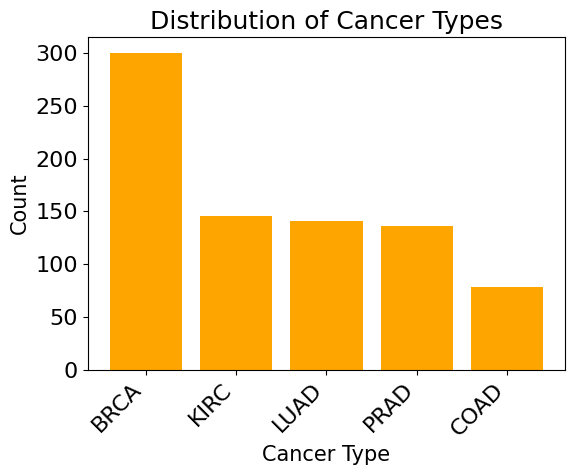

In [10]:
plt.figure(figsize=(6, 5))
plt.bar(counts.index, counts.values, color="Orange")
plt.title("Distribution of Cancer Types")
plt.xlabel('Cancer Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [11]:
X = df_combined.iloc[:,0:-1]
y = df_combined.iloc[:,-1]
print(X.shape)
print(y.shape)

(801, 20531)
(801,)


In [12]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
labels = label_encoder.classes_
print(f"Labels: {labels}")

Labels: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Normalize the data
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [14]:
MI_scores = mutual_info_classif(X_train_norm, y_train)

# Select top 50 features
n_features = 50
top_feature_indices = np.argsort(MI_scores)[::-1][:n_features]

X_train_selected = X_train_norm[:, top_feature_indices]
X_test_selected = X_test_norm[:, top_feature_indices]

In [15]:
RF = OneVsRestClassifier(RandomForestClassifier(max_features=0.2, random_state=42))
RF.fit(X_train_selected, y_train)

# Make predictions
y_pred = RF.predict(X_test_selected)
y_pred_proba = RF.predict_proba(X_test_selected)

In [16]:
accuracy = balanced_accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Balanced Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Classification report
report = classification_report(y_test, y_pred, target_names=labels)
print("\nClassification Report:\n")
print(report)

Balanced Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Classification Report:

              precision    recall  f1-score   support

        BRCA       1.00      1.00      1.00        61
        COAD       1.00      1.00      1.00        17
        KIRC       1.00      1.00      1.00        25
        LUAD       1.00      1.00      1.00        29
        PRAD       1.00      1.00      1.00        29

    accuracy                           1.00       161
   macro avg       1.00      1.00      1.00       161
weighted avg       1.00      1.00      1.00       161



In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
df_cm

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,61,0,0,0,0
COAD,0,17,0,0,0
KIRC,0,0,25,0,0
LUAD,0,0,0,29,0
PRAD,0,0,0,0,29


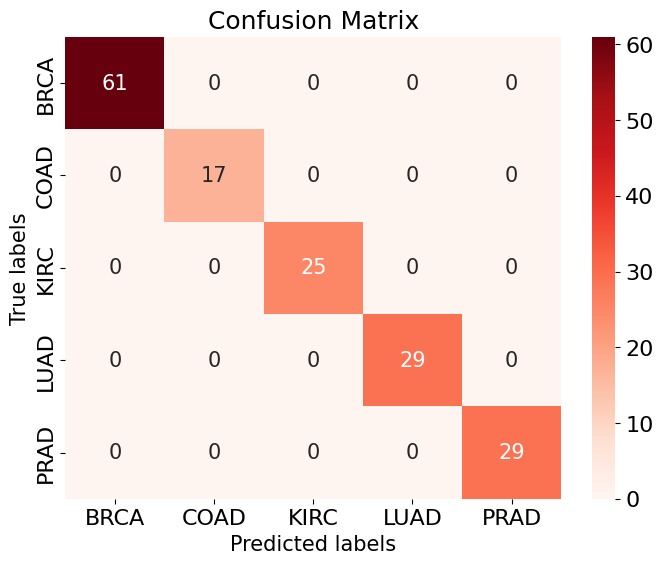

In [18]:
# Visualize Confusion Matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Reds', fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

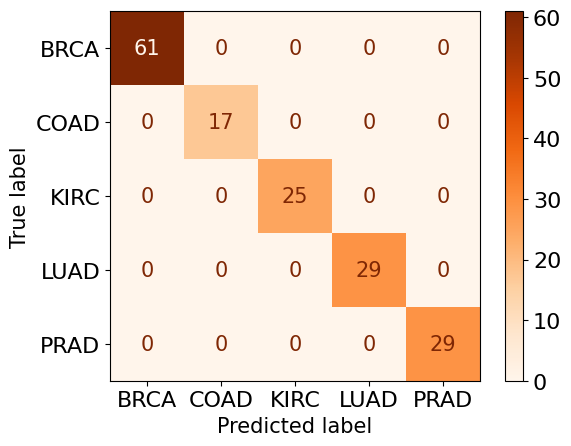

In [19]:
# Visualize Confusion Matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(
        RF, X_test_selected, y_test, cmap='Oranges', display_labels=labels)
plt.show()

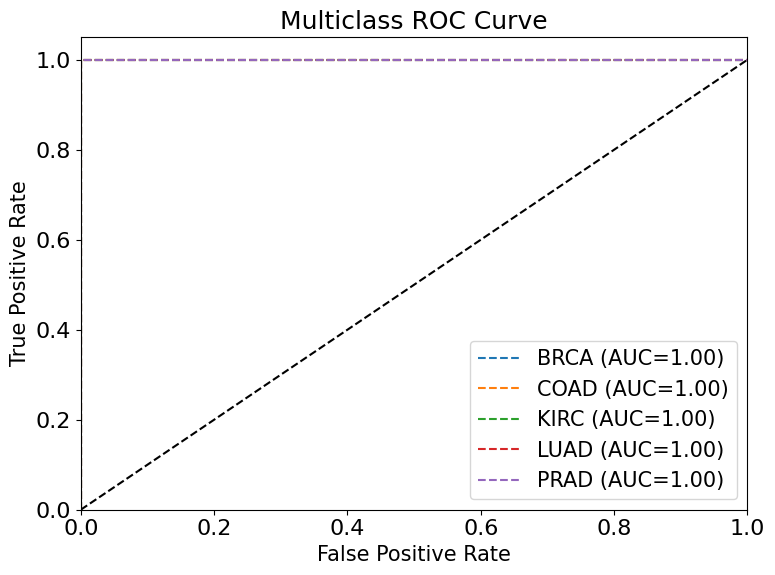

In [20]:
# ROC Curves and AUC for each class
y_test_bin = label_binarize(y_test, classes=np.unique(y_encoded))

fpr, tpr, roc_auc = dict(), dict(), dict()
for i in range(len(labels)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for i in range(len(labels)):
    plt.plot(fpr[i], tpr[i], linestyle='--', label=f'{labels[i]} (AUC={roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Multiclass ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()